In [1]:
%load_ext autoreload
%autoreload 2
%pip install prettytable
import warnings
import json
import random

warnings.filterwarnings("ignore")
# import the necessary package
from baseline.PyOD import PYOD
from tqdm import trange
from utils.data_generator import DataGenerator
from utils.myutils import Utils
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange
# import basic package
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# import the necessary package
from utils.data_generator import DataGenerator
from utils.myutils import Utils
datagenerator = DataGenerator()  # data generator
utils = Utils()  # utils function

Note: you may need to restart the kernel to use updated packages.


2023-11-20 03:49:06.647688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 03:49:06.684635: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [71]:
from baseline.PyOD import PYOD
from pyod.models.pca import PCA
# dataset and model list / dict
dataset_list = [
    "99_oilflow",
]
model_dict = {
    "PCA": PYOD
}

# save the results
df_AUCROC = pd.DataFrame(data=None, index=dataset_list, columns=model_dict.keys())
df_AUCPR = pd.DataFrame(data=None, index=dataset_list, columns=model_dict.keys())

In [81]:
# seed for reproducible results
seed = 42

for dataset in dataset_list:
    # import the dataset
    datagenerator.dataset = dataset  # specify the dataset name
    data = datagenerator.generator(
        la=0.99, realistic_synthetic_mode=None, noise_type=None
    )  # only 10% labeled anomalies are available
    for name, clf in model_dict.items():
        # model initialization
        #clf = clf(seed=seed, model_name=name)
        classfier = PCA()
        # training, for unsupervised models the y label will be discarded
        classfier.fit(data["X_train"])
        # output predicted anomaly score on testing set
        score = classfier.decision_function(data["X_test"])

        # evaluation
        result = utils.metric(y_true=data["y_test"], y_score=score)

        # save results
        df_AUCROC.loc[dataset, name] = result["aucroc"]
        df_AUCPR.loc[dataset, name] = result["aucpr"]

current noise type: None
{'Samples': 1000, 'Features': 12, 'Anomalies': 341, 'Anomalies Ratio(%)': 34.1}


In [82]:
pd.DataFrame(data['X_train']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.187048,0.500108,0.283400,0.361189,0.334573,0.314167,0.901747,0.111132,0.057493,0.934464,0.086716,0.024526
1,0.323646,0.591673,0.366024,0.448968,0.421707,0.383155,0.854208,0.166300,0.127551,0.854074,0.054929,0.060010
2,0.301289,0.481564,0.423189,0.277896,0.432153,0.278180,0.824424,0.200196,0.088168,0.895894,0.084139,0.025909
3,0.622476,0.274839,0.606416,0.316478,0.584968,0.383965,0.504306,0.407219,0.542178,0.362156,0.586931,0.331746
4,0.127059,0.873873,0.274464,0.639140,0.346140,0.550893,0.907472,0.107298,0.053810,0.937798,0.008162,1.000000


In [83]:
result

{'aucroc': 0.793870073281838, 'aucpr': 0.58484029123739}

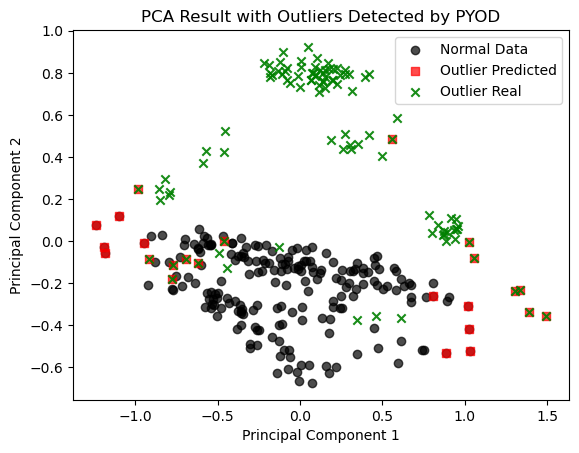

In [124]:
# Apply PCA to reduce to 2 dimensions
from sklearn.decomposition import PCA as SK_PCA
pca = SK_PCA(n_components=2)
pca_result = pca.fit_transform(data["X_test"])

# Plot the original data points
normal = np.where((data["y_test"]) == 0)
plt.scatter(pca_result[normal, 0], pca_result[normal, 1],  c='black',alpha = 0.7, label='Normal Data')

# Identify and plot the outliers detected by PYOD
predicted = np.where(classfier.predict(data["X_test"]) == 1)
outlier = np.where((data["y_test"]) == 1)
plt.scatter(pca_result[predicted, 0], pca_result[predicted, 1], c='red', marker = "s",alpha = 0.7, label='Outlier Predicted')
plt.scatter(pca_result[outlier, 0], pca_result[outlier, 1], c='green',marker = "x",alpha = 0.9, label='Outlier Real')


plt.title('PCA Result with Outliers Detected by PYOD')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [113]:
real

(array([  0,   2,   3,   5,   7,   8,   9,  11,  13,  16,  18,  23,  24,
         26,  27,  28,  33,  36,  40,  41,  45,  50,  56,  58,  66,  67,
         69,  74,  76,  80,  83,  89,  90,  92,  96, 100, 109, 111, 115,
        116, 118, 120, 123, 124, 128, 130, 132, 136, 147, 151, 160, 161,
        165, 166, 178, 183, 186, 192, 196, 200, 202, 203, 205, 206, 209,
        211, 212, 213, 217, 220, 222, 224, 226, 227, 228, 229, 232, 237,
        243, 245, 249, 250, 257, 258, 260, 261, 268, 273, 274, 276, 279,
        281, 282, 283, 284, 285, 289, 292, 293, 294, 295, 296]),)